In [3]:
# load images from folder
import os
import warnings
import numpy as np
import cv2

folder_path = "../data/processed/"
scale_test_folder = "../data/scale_test"


In [34]:
# create scale test folder
scale_test_folder = "../data/scale_test"
if not os.path.exists(scale_test_folder):
    os.makedirs(scale_test_folder)

# iterate through all subfolders
for subfolder in os.listdir(folder_path):
    # skip 95% of subfolders
    if np.random.rand() < 0.05:
    # load images from folder
        vessel_depth_path = os.path.join(
            folder_path, subfolder, "Input_EmptyVessel_Depth_segmented.npy"
        )
        liquid_depth_path = os.path.join(
            folder_path, subfolder, "Input_ContentDepth_segmented.npy"
        )
        image_path = os.path.join(folder_path, subfolder, "Input_RGBImage.png")

        if not os.path.exists(vessel_depth_path):
            warnings.warn(f"Could not find vessel depth image at {vessel_depth_path}")
            continue
        if not os.path.exists(liquid_depth_path):
            warnings.warn(f"Could not find liquid depth image at {liquid_depth_path}")
            continue
        if not os.path.exists(image_path):
            warnings.warn(f"Could not find image at {image_path}")
            continue

        vessel_depth = np.load(vessel_depth_path).astype(np.float32)
        # convert from log scale to linear scale
        vessel_depth = np.exp(vessel_depth)
        liquid_depth = np.load(liquid_depth_path).astype(np.float32)
        # convert from log scale to linear scale
        liquid_depth = np.exp(liquid_depth)
        image = cv2.imread(image_path)

        # get mean of vessel depth for non-zero values
        vessel_depth = vessel_depth[vessel_depth != 1]
        vessel_depth_mean = np.mean(vessel_depth)
        # get mean of liquid depth for non-zero values
        liquid_depth = liquid_depth[liquid_depth != 1]
        liquid_depth_mean = np.mean(liquid_depth)

        # save image in new folder
        # create folder for scale test
        scale_test_subfolder = os.path.join(scale_test_folder, subfolder)
        if not os.path.exists(scale_test_subfolder):
            os.makedirs(scale_test_subfolder)

        # save images
        cv2.imwrite(os.path.join(scale_test_subfolder, "image.png"), image)

        # save mean of vessel depth and liquid depth
        with open(os.path.join(scale_test_subfolder, "vessel_depth_mean.txt"), "w") as f:
            print(vessel_depth_mean, file=f)
        with open(os.path.join(scale_test_subfolder, "liquid_depth_mean.txt"), "w") as f:
            print(liquid_depth_mean, file=f)

c:\Users\apo_n\miniconda3\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\apo_n\miniconda3\envs\thesis\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
# load data from folder
import os
import warnings
import numpy as np
import cv2

folder_path = "../data/scale_test/"

liquid_depth_mean_list = []
vessel_depth_mean_list = []
distance_list = []
path_list = []


# iterate through all subfolders
for subfolder in os.listdir(folder_path):
    # if "Ducan_250" is in subfolder name
    if "Duran_250" in subfolder:
        # load mean of vessel depth and liquid depth and save in list
        vessel_depth_mean_path = os.path.join(folder_path, subfolder, "vessel_depth_mean.txt")
        liquid_depth_mean_path = os.path.join(folder_path, subfolder, "liquid_depth_mean.txt")
        distance_path = os.path.join(folder_path, subfolder, "distance_selection.txt")
        image_path = os.path.join(folder_path, subfolder, "image.png")

        if not os.path.exists(vessel_depth_mean_path):
            continue
        if not os.path.exists(liquid_depth_mean_path):
            continue
        if not os.path.exists(distance_path):
            continue

        vessel_depth_mean = float(open(vessel_depth_mean_path, "r").read().strip())
        liquid_depth_mean = float(open(liquid_depth_mean_path, "r").read().strip())
        distance = open(distance_path, "r").read().strip()

        liquid_depth_mean_list.append(liquid_depth_mean)
        vessel_depth_mean_list.append(vessel_depth_mean)
        distance_list.append(distance)
        path_list.append(image_path)

# convert lists to numpy arrays
liquid_depth_mean_list = np.array(liquid_depth_mean_list)
vessel_depth_mean_list = np.array(vessel_depth_mean_list)
distance_list = np.array(distance_list)
path_list = np.array(path_list)




In [2]:
liquid_depth_mean_list

array([25.101496, 25.345987, 25.019903, 25.414112, 25.219706, 25.171217,
       24.661543, 25.148592, 25.18084 , 24.61441 , 24.782999, 24.376379,
       24.324938, 24.612915, 25.061848, 24.588228, 25.481083, 25.649395,
       24.393559, 25.776003, 25.132828, 24.80707 , 24.439482, 24.948809])

In [3]:
vessel_depth_mean_list

array([2.3945372, 2.4036403, 2.3913589, 2.415453 , 2.4080389, 2.4213753,
       2.3919246, 2.4063578, 2.404392 , 2.4057763, 2.3991773, 2.388067 ,
       2.3860848, 2.3898244, 2.4009657, 2.398228 , 2.4272017, 2.4192417,
       2.3653693, 2.4074478, 2.3917925, 2.3802311, 2.3622818, 2.3839571])

In [4]:
distance_list

array(['medium', 'medium', 'close', 'medium', 'medium', 'medium', 'close',
       'far', 'far', 'medium', 'close', 'close', 'close', 'medium', 'far',
       'medium', 'far', 'far', 'close', 'far', 'medium', 'close', 'close',
       'medium'], dtype='<U6')

In [17]:
# sort lists by distance
liquid_depth_mean_list_sorted = liquid_depth_mean_list[np.argsort(liquid_depth_mean_list)]
vessel_depth_mean_list_sorted = vessel_depth_mean_list[np.argsort(vessel_depth_mean_list)]
distance_list_sorted = distance_list[np.argsort(liquid_depth_mean_list)]
path_list_sorted = path_list[np.argsort(vessel_depth_mean_list)]


In [9]:
liquid_depth_mean_list_sorted

array([24.324938, 24.376379, 24.393559, 24.439482, 24.588228, 24.612915,
       24.61441 , 24.661543, 24.782999, 24.80707 , 24.948809, 25.019903,
       25.061848, 25.101496, 25.132828, 25.148592, 25.171217, 25.18084 ,
       25.219706, 25.345987, 25.414112, 25.481083, 25.649395, 25.776003])

In [10]:
distance_list_sorted

array(['close', 'close', 'close', 'close', 'medium', 'medium', 'medium',
       'close', 'close', 'close', 'medium', 'close', 'far', 'medium',
       'medium', 'far', 'medium', 'far', 'medium', 'medium', 'medium',
       'far', 'far', 'far'], dtype='<U6')

In [28]:
vessel_depth_mean_list_sorted

array([1.082643 , 1.0992061, 1.1043998, 1.1123946, 1.1375798, 1.1611073,
       1.1766472, 1.2041103, 1.2179611, 1.2278503, 1.2321129, 1.2361629,
       1.2523743, 1.2670139, 1.293585 , 1.3272744, 1.3465309])

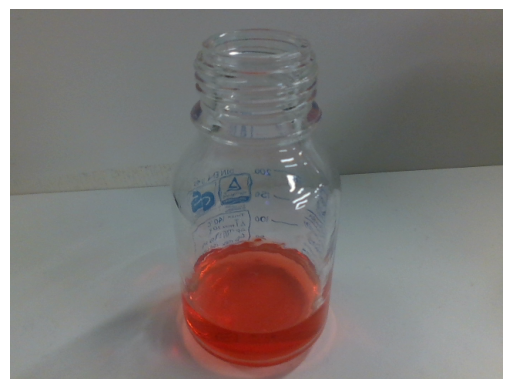

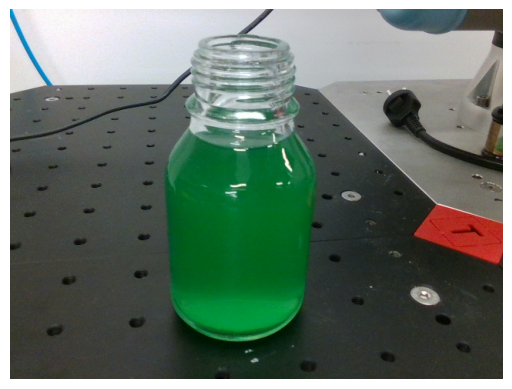

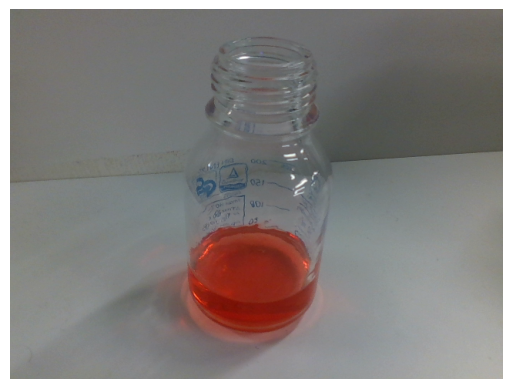

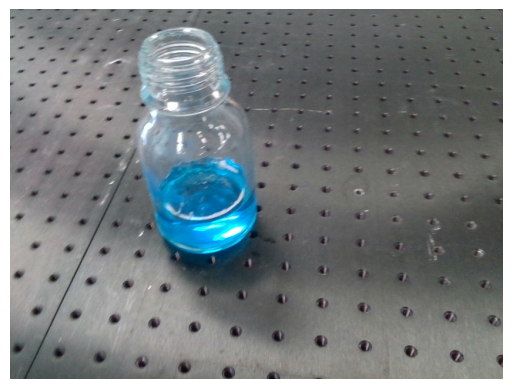

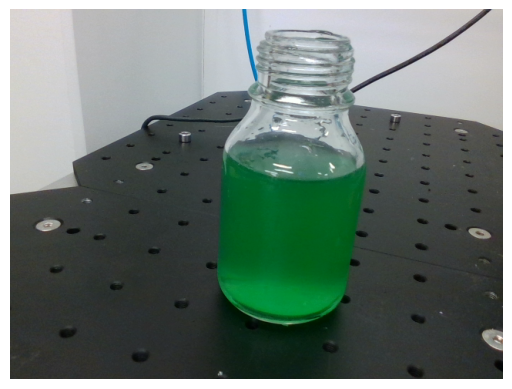

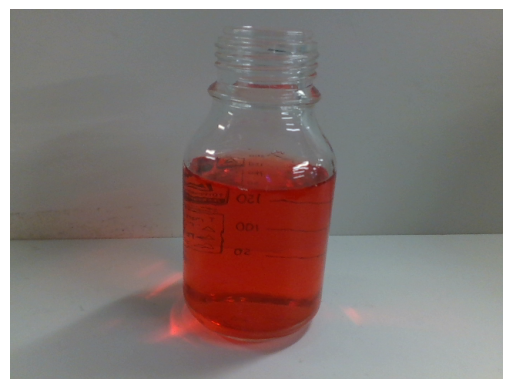

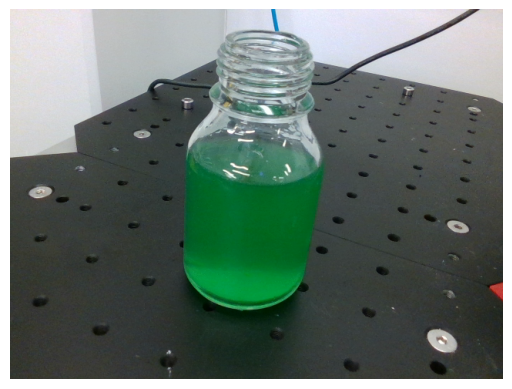

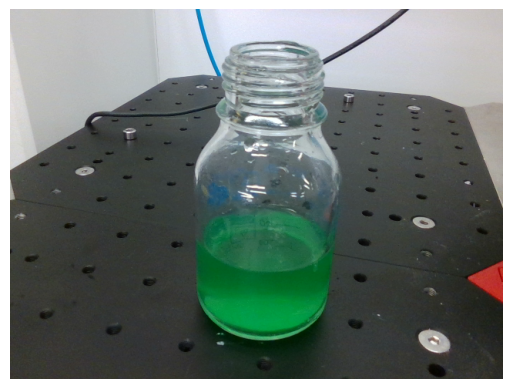

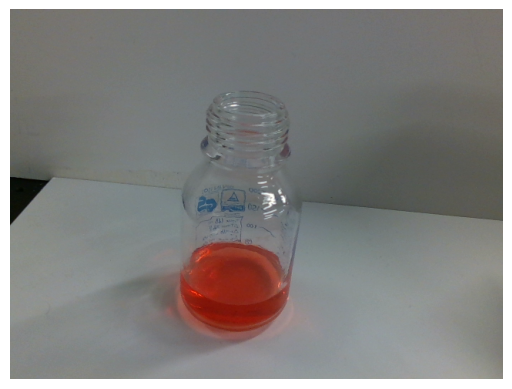

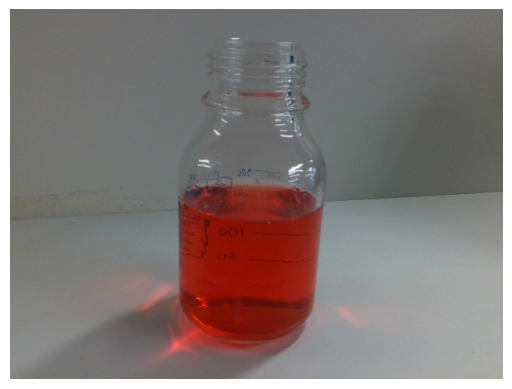

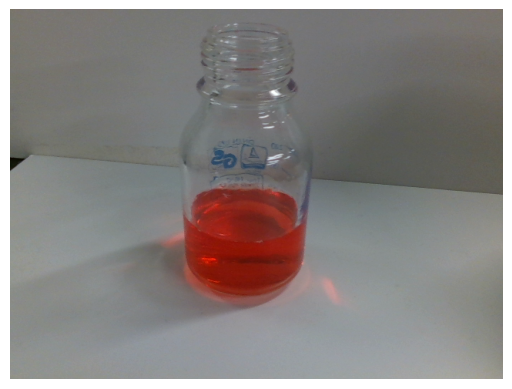

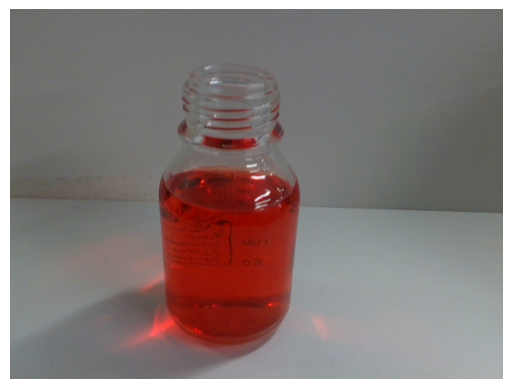

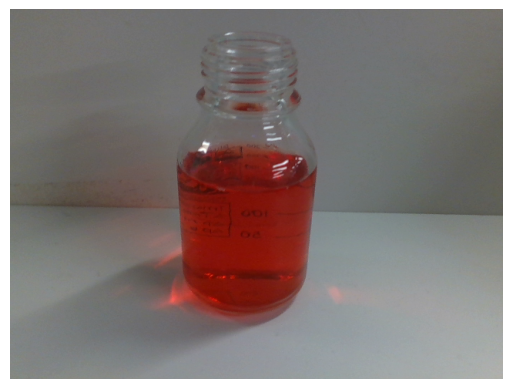

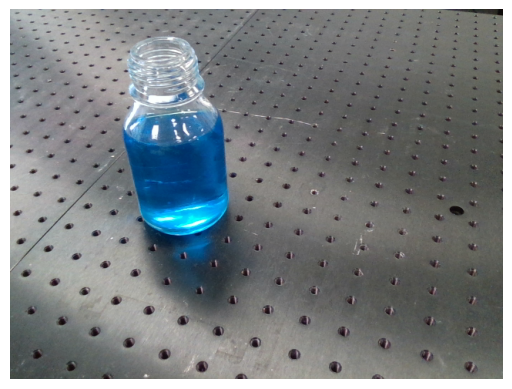

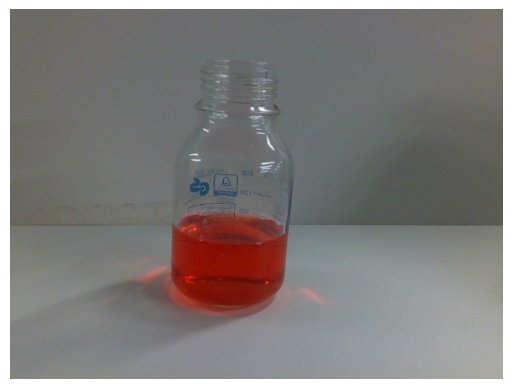

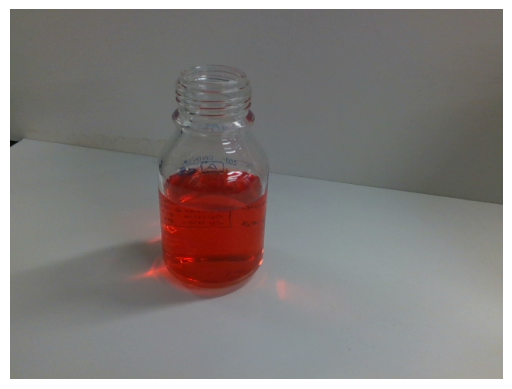

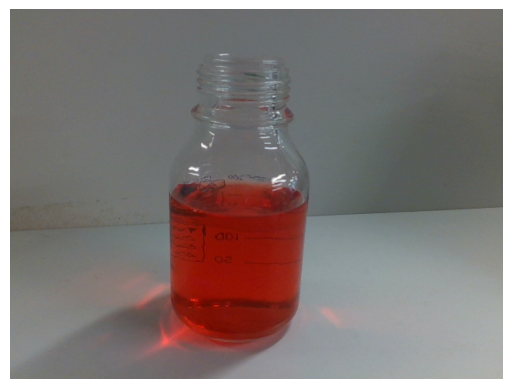

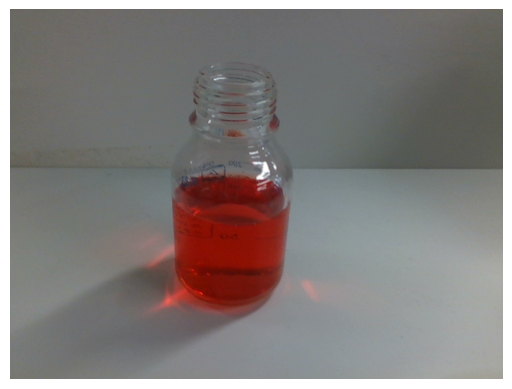

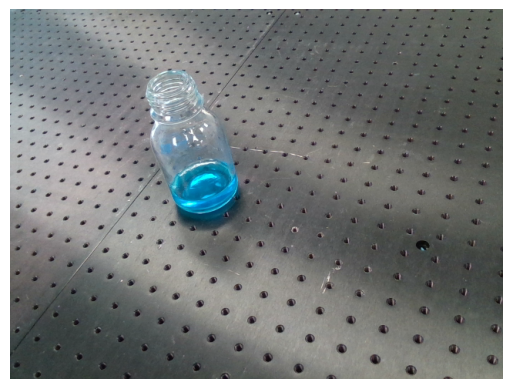

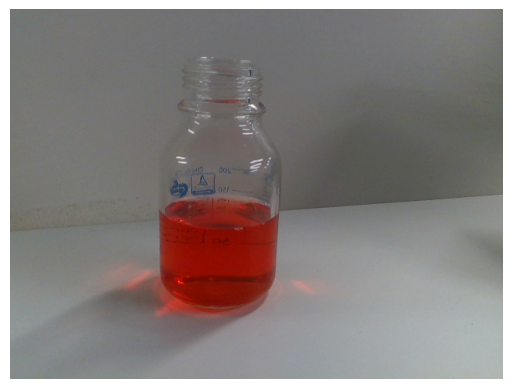

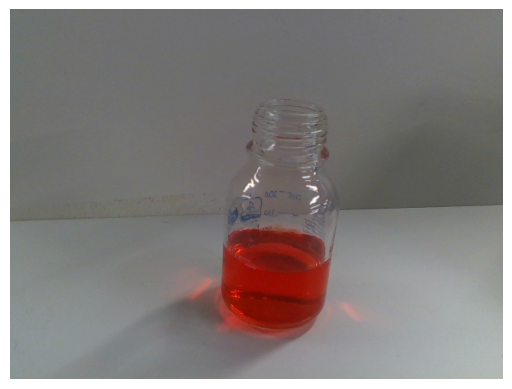

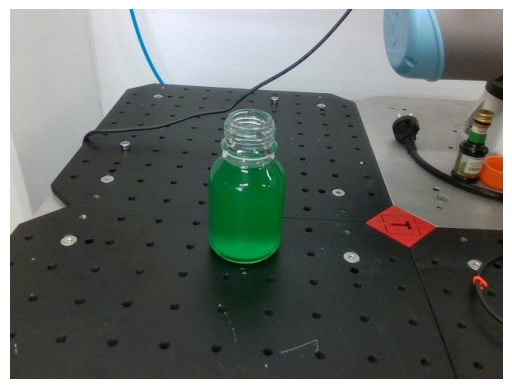

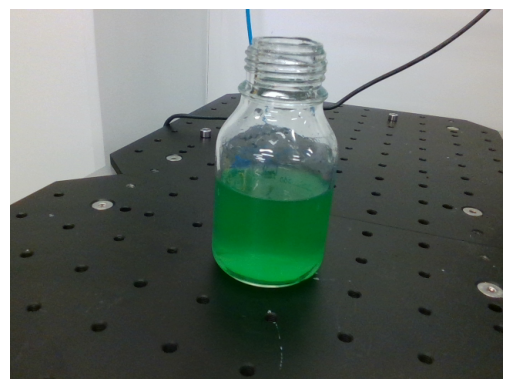

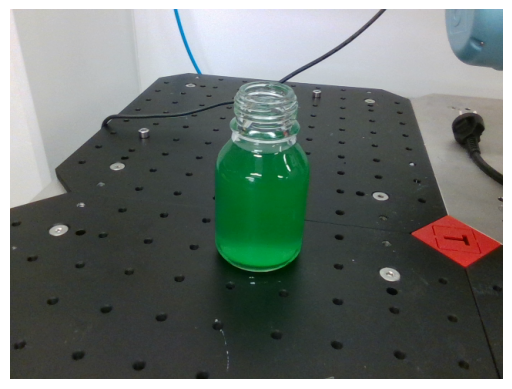

In [18]:
# show the images in order of distance
import matplotlib.pyplot as plt
from matplotlib.image import imread

for i in range(len(path_list_sorted)):
    image = imread(path_list_sorted[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

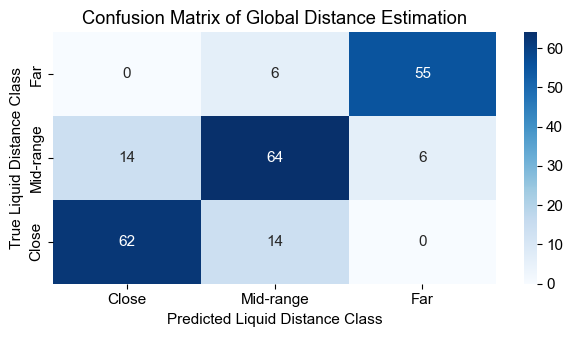

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# visualize depth map
plt.figure(figsize=(6.3, 3.5))    

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11

# Create the confusion matrix
cm = np.array([[0, 6, 55],
               [14, 64, 6],
               [62, 14, 0]])

# Define the class labels
classes = ['Close', 'Mid-range', 'Far']

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels, title, and axis ticks
plt.xlabel('Predicted Liquid Distance Class')
plt.ylabel('True Liquid Distance Class')
plt.title('Confusion Matrix of Global Distance Estimation')
classes_true = ['Far', 'Mid-range', 'Close']
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes_true)
# dont show the color explanation
plt.tight_layout()
plt.savefig('../output/confusion_matrix.png', format='png', dpi=900)

# Show the plot
plt.show()
